In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")

import os
import nltk
import nltk.corpus
import spacy
import re

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score

from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

C:\Users\Egharevba Blessing\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("spam.csv", encoding = "latin1")
data1 = pd.read_csv("spam_additional.xls")

In [3]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], 1)
data1 = data1.drop("Unnamed: 0", 1)

In [4]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data1.head()

,Text,spam
0,"Dear Customer,\nThis is a confirmation that th...",spam
1,"Hello ADEYINKA, present your CV for interview ...",spam
2,Edgerit Limited invites you for an interview f...,spam
3,You are invited for an aptitude test with UBA ...,spam
4,"Mag consult ltd, shortlisted (you/candidate no...",spam


In [6]:
data = data.rename(columns = {'v1':'category','v2':'message'})
data1 = data1.rename(columns = {'spam':'category','Text':'message'})

df = pd.concat([data, data1], 0).reset_index().drop("index", 1)
df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.tail()

,category,message
6007,spam,This is a fraud alert from HSBC. We need to ve...
6008,spam,80% Off Louis Vuitton Handbags Save Up To 80% ...
6009,spam,This Diwali book your spacious 2bhk apt @The G...
6010,spam,(We are sorry but your:BnkOfAmericaDEBIT is te...
6011,spam,to use a new promotional balance transfer rate...


In [8]:
df.isnull().sum()

category    0
message     0
dtype: int64

In [9]:
df.describe()

,category,message
count,6012,6012
unique,2,5602
top,ham,"Sorry, I'll call later"
freq,4825,30


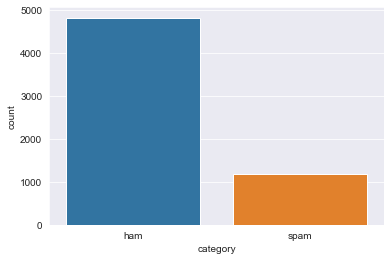

In [10]:
sns.countplot(df.category)

In [11]:
df.groupby("category").describe()

message                                                            \
           count unique                                                top   
category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam        1187   1086  Please call our customer service representativ...   

               
         freq  
category       
ham        30  
spam        4

In [12]:
# To check if we have duplicate rows
dup = df[df.duplicated(subset = None, keep = 'first')]

dup

,category,message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5766,spam,You are invited for an aptitude test with UBA ...
5877,spam,This is your interview invite with MAG CONSULT...
5885,spam,Dps invites u for an interview chat to work wi...
5914,spam,bvnBVN ALERT:DEAR CUSTOMER YOUR ATN CARD AND A...


In [13]:
dup.category.value_counts()

ham     309
spam    101
Name: category, dtype: int64

In [14]:
# To drop duplicated rows
df = df.drop_duplicates()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5602 entries, 0 to 6011
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5602 non-null   object
 1   message   5602 non-null   object
dtypes: object(2)
memory usage: 131.3+ KB


In [16]:
df["message_len"] = df["message"].apply(len)
df["words in text"]= df['message'].str.split().map(lambda x: len(x))

category = pd.get_dummies(df["category"], drop_first=True)
df["category"] = category

df.head()

,category,message,message_len,words in text
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [17]:
df.message_len.describe()

count    5602.000000
mean       99.956980
std       122.488919
min         2.000000
25%        37.000000
50%        67.000000
75%       134.000000
max      2809.000000
Name: message_len, dtype: float64

Text(0.5, 0.98, 'Characters in texts')

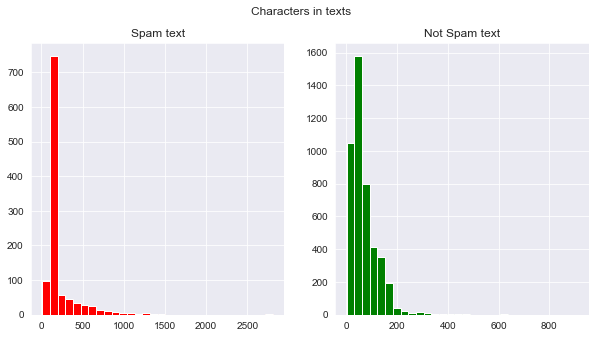

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

text_len=df[df['category']==1]["message_len"]
ax1.hist(text_len,color='red', bins = 30)
ax1.set_title('Spam text')


text_len=df[df['category']==0]["message_len"]
ax2.hist(text_len,color='green', bins = 30)
ax2.set_title('Not Spam text')


fig.suptitle('Characters in texts')

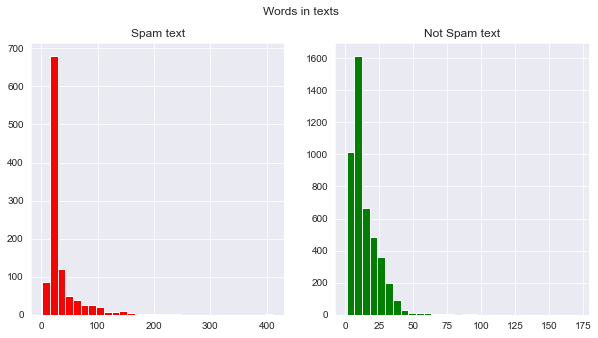

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

text_len=df[df['category']==1]["words in text"]
ax1.hist(text_len,color='red', bins = 30)
ax1.set_title('Spam text')

text_len=df[df['category']==0]["words in text"]
ax2.hist(text_len,color='green', bins = 30)
ax2.set_title('Not Spam text')

fig.suptitle('Words in texts')
plt.show()

In [20]:
# To remove punctuation and numbers and to change all words to lowercase

punctuation = re.compile(r'[-.?!,:;()#""''&|0-9]')
post_punctuation =[]
for words in df.message:
    word = punctuation.sub("", words).lower()
    post_punctuation.append(word)

In [21]:
# To remove stopwords

df["p_message"] = post_punctuation 

stop_words = set(stopwords.words('english'))
df['p_message'] = df['p_message'].apply(lambda x: ' '.join(word for word in x.split() if not word in stop_words))

df["p_message_len"] = df.p_message.apply(len)

In [22]:
df.head()

,category,message,message_len,words in text,p_message,p_message_len
0,0,"Go until jurong point, crazy.. Available only ...",111,20,go jurong point crazy available bugis n great ...,82
1,0,Ok lar... Joking wif u oni...,29,6,ok lar joking wif u oni,23
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,free entry wkly comp win fa cup final tkts st ...,109
3,0,U dun say so early hor... U c already then say...,49,11,u dun say early hor u c already say,35
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,nah think goes usf lives around though,38


Text(0.5, 0.98, 'Characters in texts')

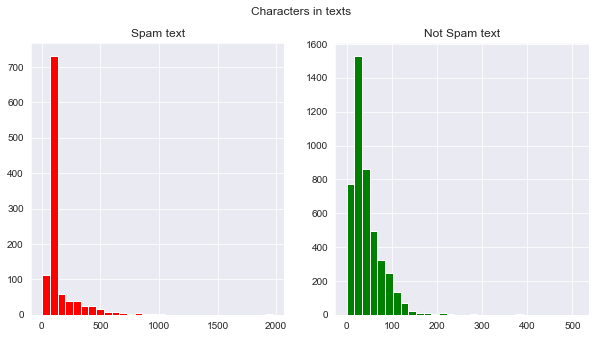

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

text_len=df[df['category']==1]["p_message_len"]
ax1.hist(text_len,color='red', bins = 30)
ax1.set_title('Spam text')


text_len=df[df['category']==0]["p_message_len"]
ax2.hist(text_len,color='green', bins = 30)
ax2.set_title('Not Spam text')


fig.suptitle('Characters in texts')

In [24]:
spam_mess = df[df["category"] == 1]
Ham_mess = df[df["category"] == 0]

### Most common used words in spam message

In [25]:
message = []
for word in spam_mess.p_message:
    token = word_tokenize(word)
    message.append(token)
    
# To get the frequncy of words in a sentence

fdist = FreqDist()

for word in message:
    for i in word:
        fdist[i]+=1
fdist

fdist_spam = fdist.most_common(150) #top 100 most common words
print(fdist_spam)

[('call', 418), ('interview', 272), ('å£', 219), ('lagos', 207), ('free', 198), ('please', 158), ('u', 153), ('time', 152), ('dear', 149), ('come', 148), ('th', 140), ('stop', 138), ('cv', 130), ('txt', 128), ('ur', 127), ('customer', 123), ('text', 114), ('application', 112), ('invited', 111), ('reply', 110), ('mobile', 107), ('claim', 98), ('//', 98), ('@', 97), ('street', 97), ('ikeja', 96), ('copy', 92), ('date', 89), ('kindly', 88), ('road', 87), ('get', 84), ('card', 84), ('prize', 83), ('new', 78), ('+', 76), ('contact', 73), ("'s", 72), ('p', 69), ('bank', 69), ('us', 68), ('hr', 68), ('send', 66), ('selected', 66), ('venue', 66), ('service', 65), ('along', 65), ('regards', 64), ('details', 63), ('human', 63), ('ltd', 59), ('due', 59), ('job', 59), ('urgent', 58), ('nokia', 58), ('position', 58), ('one', 57), ('online', 57), ('account', 56), ('address', 56), ('shortlisted', 55), ('cash', 53), ('line', 53), ('confirm', 52), ('resource', 52), ('bvn', 52), ('office', 50), ('passpo

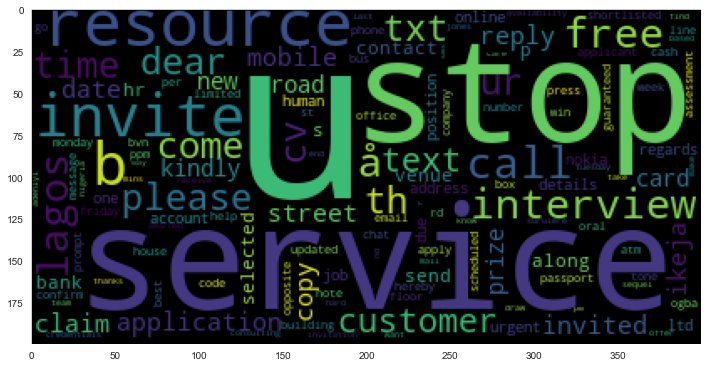

In [26]:
spam= []
for (a,b) in fdist_spam:
    spam.append(a)
spam = " ".join(spam)


plt.figure(figsize=(12,12))
plt.grid(False)

spam_cloud = WordCloud(background_color= "black", stopwords=STOPWORDS).generate(spam)
plt.imshow(spam_cloud)

### Most common used words in Ham messages

In [27]:
message = []
for word in Ham_mess.p_message:
    token = word_tokenize(word)
    message.append(token)
    

fdist = FreqDist()

for word in message:
    for i in word:
        fdist[i]+=1

fdist_ham = fdist.most_common(200)
print(fdist_ham)

[('u', 899), ('i', 568), ("'m", 371), ("'s", 306), ('get', 295), ('ltgt', 254), ('ok', 246), ('go', 241), ('got', 236), ('know', 221), ('like', 219), ('come', 208), ('good', 205), ('ur', 196), ('call', 184), ('time', 181), ("'ll", 180), ('love', 168), ('day', 167), ('going', 162), ('want', 159), ('lor', 157), ('one', 156), ('home', 151), ('need', 151), ('still', 141), ('see', 134), ('think', 126), ('back', 126), ('da', 124), ('dont', 120), ('r', 120), ('n', 119), ('ì_', 119), ('sorry', 119), ('today', 118), ('tell', 116), ('take', 109), ('send', 108), ('hi', 107), ('well', 106), ('much', 106), ('oh', 104), ('night', 101), ('wat', 99), ('hey', 99), ('later', 97), ('na', 96), ('hope', 96), ('great', 94), ('way', 94), ('happy', 93), ('give', 90), ('already', 89), ('ask', 87), ('make', 85), ('yeah', 85), ('really', 83), ('work', 83), ('say', 82), ('wan', 81), ('right', 78), ('e', 77), ('pls', 77), ('cos', 76), ('said', 75), ('dear', 75), ('im', 74), ('lol', 73), ("'ve", 71), ('anything', 7

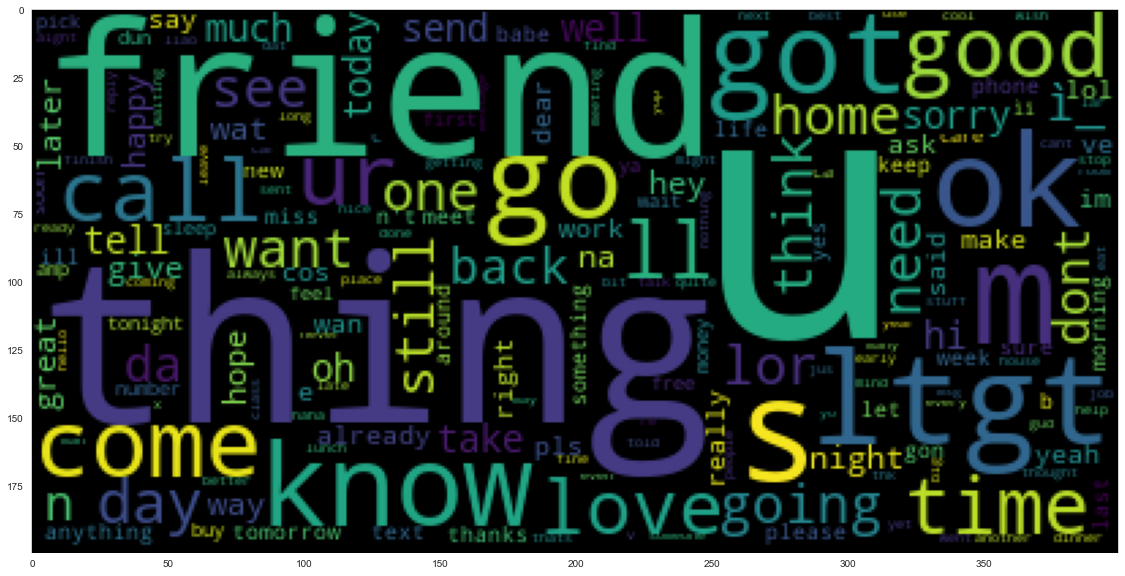

In [28]:
ham = []
for (a,b) in fdist_ham:
    ham.append(a)
ham = " ".join(ham)


ham_cloud = WordCloud(background_color= "black", stopwords=STOPWORDS).generate(ham)
plt.figure(figsize=(20,10))
plt.grid(False)
plt.imshow(ham_cloud)

#### Stemming

In [29]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_words = []
for word in df.p_message:
    stemmed_words.append(stemmer.stem(word))

    " ".join(stemmed_words)
    
# stemmed_words

In [30]:
df["p_message"] = stemmed_words
df["p_message_len"] = df.p_message.apply(len)

In [31]:
df.head()

,category,message,message_len,words in text,p_message,p_message_len
0,0,"Go until jurong point, crazy.. Available only ...",111,20,go jurong point crazy available bugis n great ...,82
1,0,Ok lar... Joking wif u oni...,29,6,ok lar joking wif u oni,23
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,free entry wkly comp win fa cup final tkts st ...,108
3,0,U dun say so early hor... U c already then say...,49,11,u dun say early hor u c already say,35
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,nah think goes usf lives around though,38


# Using Spacy vector

In [32]:
nlp = spacy.load("en_core_web_md")

In [33]:
docs = [nlp(text) for text in stemmed_words]
X_vectors = [doc.vector for doc in docs]

y = np.array(df.category)

X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.25, random_state=42)

In [34]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train, y_train)
predict = clf_svm.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1124
           1       0.86      0.88      0.87       277

    accuracy                           0.95      1401
   macro avg       0.91      0.92      0.92      1401
weighted avg       0.95      0.95      0.95      1401



In [35]:
#importing RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1124
           1       0.98      0.83      0.90       277

    accuracy                           0.96      1401
   macro avg       0.97      0.91      0.94      1401
weighted avg       0.96      0.96      0.96      1401



# Using CountVectorizer

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
X = cv.fit_transform(stemmed_words).toarray()

y = np.array(df.category)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Support vector Machine

In [38]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train, y_train)
predict = clf_svm.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1124
           1       0.98      0.88      0.93       277

    accuracy                           0.97      1401
   macro avg       0.98      0.94      0.96      1401
weighted avg       0.97      0.97      0.97      1401



#### logistic regression

In [39]:
# importing logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1124
           1       0.99      0.88      0.93       277

    accuracy                           0.97      1401
   macro avg       0.98      0.94      0.96      1401
weighted avg       0.97      0.97      0.97      1401



##### RandomForestClassifier

In [40]:
#importing RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1124
           1       1.00      0.81      0.89       277

    accuracy                           0.96      1401
   macro avg       0.98      0.90      0.93      1401
weighted avg       0.96      0.96      0.96      1401



In [41]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
MNB_pred = MNB.predict(X_test)


print(classification_report(y_test, MNB_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1124
           1       0.92      0.94      0.93       277

    accuracy                           0.97      1401
   macro avg       0.95      0.96      0.96      1401
weighted avg       0.97      0.97      0.97      1401



In [42]:
models = ['Support Vector Machine', 'Logistic Regression' , 'Random Forest Classifier','MultinomialNB']
predictions = [predict, lr_pred, rf_pred,MNB_pred ]

In [43]:
# To get the recall score for each model

for (i,j) in zip(predictions, models):
        model_precision = precision_score(y_test, i)
        print("The precision score for {} is {}".format(j, model_precision))

The precision score for Support Vector Machine is 0.9838709677419355
The precision score for Logistic Regression is 0.9878048780487805
The precision score for Random Forest Classifier is 1.0
The precision score for MultinomialNB is 0.9217081850533808


In [44]:
# to get the accuracy score of each model

for (i,j) in zip(predictions, models):
        model_accuracy = accuracy_score(y_test, i)
        print("The accuracy score for {} is {}".format(j, model_accuracy))

The accuracy score for Support Vector Machine is 0.9735902926481085
The accuracy score for Logistic Regression is 0.9735902926481085
The accuracy score for Random Forest Classifier is 0.961456102783726
The accuracy score for MultinomialNB is 0.9714489650249821
